#### First we need to import the necessary modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

#### Now we have to prepare the data for training and evaluation.

In [2]:
data = pd.read_csv('./train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

#### Traing.

In [3]:
W1, b1, W2, b2 = utils.gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 4 7 ... 0 5 3] [1 5 9 ... 7 2 9]
0.11936585365853658
Iteration:  100
[1 7 9 ... 2 2 4] [1 5 9 ... 7 2 9]
0.6432439024390244
Iteration:  200
[1 5 9 ... 2 2 9] [1 5 9 ... 7 2 9]
0.7580731707317073
Iteration:  300
[1 5 9 ... 2 2 9] [1 5 9 ... 7 2 9]
0.8128048780487804
Iteration:  400
[1 5 9 ... 2 2 9] [1 5 9 ... 7 2 9]
0.8412682926829268


#### about ~85 % accuracy.

In [4]:
#### Now we try to evaluate the code

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = utils.forward_prop(W1, b1, W2, b2, X)
    predictions = utils.get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


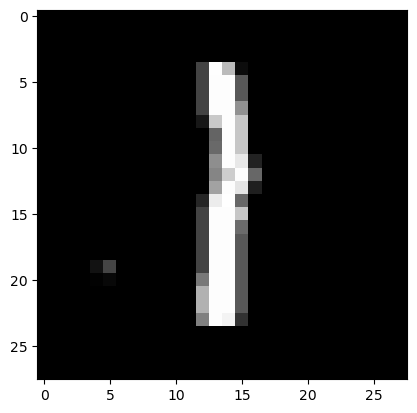

Prediction:  [5]
Label:  5


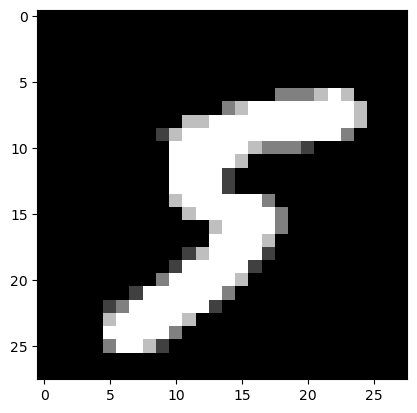

Prediction:  [9]
Label:  9


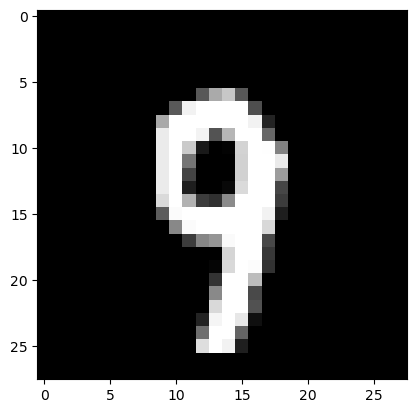

Prediction:  [4]
Label:  4


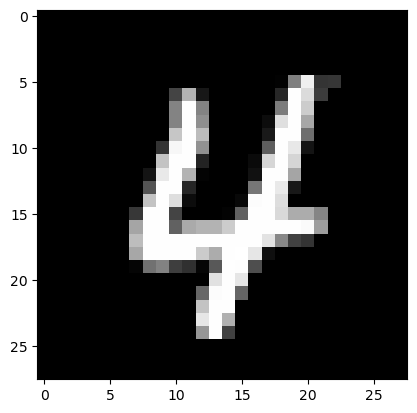

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)